In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Taller 1: Métodos Computacionales
### Estudiantes: Andrés Hernández ()    Francisco Díaz (201912252)

## 1. Caída libre
### 1.1 
Considere las ecuaciones de movimiento para una partícula en caída libre para el caso ideal:

$$
\begin{align*}
m\frac{d^{2}y}{dt^{2}} &= -mg   & y(t) &= y_{0} +v_{0}t-\frac{1}{2}gt^{2} 
\end{align*}
$$
donde $g= 9.8 \; m/s^2$ ,$y_{0} = 0$ y $v_{0} = 50 \; m/s $.

**a)** Dibuje la posición y velocidad como función del tiempo, iterando hasta que el sistema llegue hasta la posición inicial.

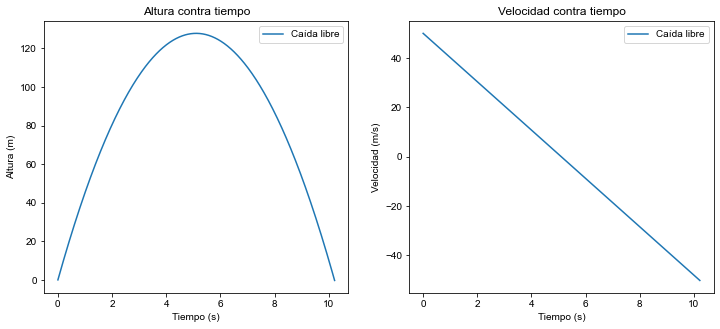

In [2]:
#Primero definiremos las clases de acuerdo al tipo de movimiento que el usuario requiera:
class libre:
    g=9.8
    def __init__(self,y0=0.0,vy0=50.0,m0=2.0):
        self.y=y0
        self.vy=vy0
        self.m=m0
        self.Fy=-m0*self.g
        self.Ttotal = 0
    def muevete(self,dt):
        self.y += self.vy*dt
        self.vy += (self.Fy/self.m)*dt
    def imprime(self,t):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t,self.y,self.vy)
    def darY(self,t):
        return self.y
class amortiguado(libre):
    def __init__(self,y0=0.0,vy0=50.0,m0=2.0,C0=0.8,rho0 = 1.225, R0 = 0.05):
        super().__init__(y0,vy0,m0)
        self.C=C0
        self.rho = rho0
        self.R= R0
        self.Fy=-m0*self.g+(1/2)*rho0*C0*(np.pi*(R0**2))*(vy0**2)
    def muevete(self,dt):
        super().muevete(dt)
        self.Fy=-self.m*self.g-(1/2)*self.rho*self.C*(np.pi*(self.R**2))*(self.vy**2)
    def imprime(self,t):
        return "{0:.3f}   {1:.3f}   {2:.3f}".format(t,self.y,self.vy)
#Definiremos las variables globales correspondientes a los tiempos de vuelo de cada movimiento

TFinal1, TFinal2 = 0. , 0.

#Para generar el conjunto de datos creamos un archivo temporal .dat

def generardatos(clase,filename,c):
    if filename == "amortiguado":
        cuerpo=clase(C0=c)
    else:
        cuerpo=clase()
    t=0.0
    dt=1.0e-2  #Diferencial de tiempo que utilizaremos
    f=open(filename+".dat","w+")
    while cuerpo.darY(t) >= 0:    
        st=cuerpo.imprime(t)
        f.write(st+"\n")
        cuerpo.muevete(dt)
        t+=dt
    st=cuerpo.imprime(t)
    #Almacenamos el tiempo de vuelo del respectivo tipo de movimiento para el punto (c)
    if filename =='libre':
        global TFinal1
        TFinal1=t
    else:
        global TFinal2
        TFinal2=t
    f.write(st)
    f.close()


#Generamos y realizamos la lectura de los datos. Adicionalmente, eliminamos el archivo temporal.

generardatos(libre,"libre",0.8)
def readxyv(filename,i,j,k):
    f=open(filename+".dat","r")
    l=f.readlines()
    f.close()
    x,y,v=[],[],[]
    for n in l:
        dat=n.split()
        x.append(float(dat[i]))
        y.append(float(dat[j]))
        v.append(float(dat[k]))
    os.remove(filename+".dat")
    return x,y,v

### Ahora graficaremos la trayectoría par la caída libre ideal

x1,y1,v1=readxyv("libre",0,1,2)

fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax1.plot(x1,y1,label="Caída libre")
ax1.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')
ax1.legend()

ax2=fig.add_subplot(122)
ax2.plot(x1,v1,label="Caída libre")
ax2.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax2.legend()

plt.style.use('seaborn-whitegrid')
plt.show()



Ahora asuma que el sistema está sometido a una fuerza resistiva:
\begin{align*}
 m\frac{d^{2}y}{dt^{2}} &= -b +\frac{1}{2}C \rho A v^{2}  & y(t) &= y_{0} + \frac{1}{\gamma ^{2}} ln \left [ \frac{\cosh(\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}}))}{\cosh(-\gamma \sqrt{g}t+\tanh^{-1}(\frac{\gamma v_{0}}{\sqrt{g}})}\right]
\end{align*}

 donde $C=0.8$ , $\rho = 1.225 \; kg/m^{3}$ y $A=\pi R^{2}$ con $R=0.05 \; m$.
 #### Nota: La demostración analítica de estas ecuaciones se encuentra adjunta en formato pdf.
 
 **b)** Dibuje la posición y velocidad como función del tiempo en la misma gráfica del caso ideal

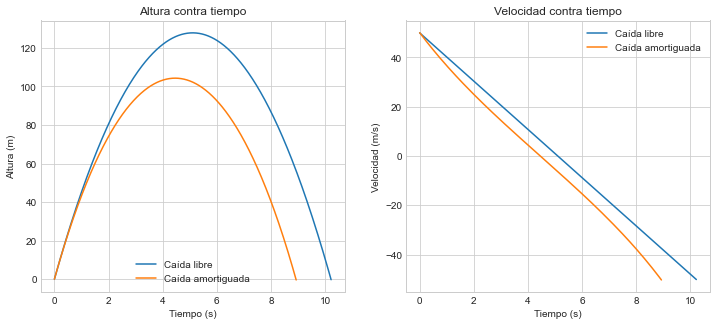

In [3]:
#Generamos los datos correspondientes al movimiento amortiguado.
generardatos(amortiguado,"amortiguado",0.8)

### Ahora graficaremos las trayectorias

x2,y2,v2=readxyv("amortiguado",0,1,2)

fig2=plt.figure(figsize=(12,5))
ax3=fig2.add_subplot(121)
ax3.plot(x1,y1,label="Caída libre")
ax3.plot(x2,y2,label="Caída amortiguada")
ax3.set(xlabel='Tiempo (s)', ylabel='Altura (m)',title='Altura contra tiempo')

ax4=fig2.add_subplot(122)
ax4.plot(x1,v1,label="Caída libre")
ax4.plot(x2,v2,label="Caída amortiguada")
ax4.set(xlabel='Tiempo (s)', ylabel='Velocidad (m/s)',title='Velocidad contra tiempo')
ax3.legend()
ax4.legend()
plt.style.use('seaborn-whitegrid')
plt.show()



**c)** ¿Cuál es el tiempo de vuelo para ambos casos?

In [4]:
print("Utilizando los datos almacenados en el inciso (a) tenemos que: \nTiempo de vuelo caída libre = " +str(TFinal1)+ " s \nTiempo de vuelo caida amortiguada = "+str(TFinal2)+" s")


Utilizando los datos almacenados en el inciso (a) tenemos que: 
Tiempo de vuelo caída libre = 10.219999999999827 s 
Tiempo de vuelo caida amortiguada = 8.929999999999854 s


**d)** ) Estudie el comportamiento del tiempo de vuelo como función de C.


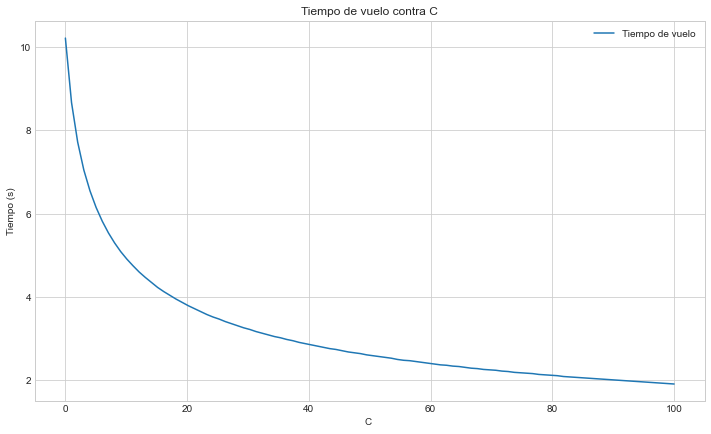

In [5]:
#Definiremos una nueva función generadora de datos en la que solo almacenaremos el tiempo de vuelo respecto al valor de entrada C
def generardatosC(clase,c):
    tiempoVuelo=[]
    i=0
    while i < len(c):
        cuerpo=clase(C0=c[i])
        t=0.0
        dt=1.0e-2 
        while cuerpo.darY(t) >= 0:    
            cuerpo.muevete(dt)
            t+=dt
        tiempoVuelo.append(t)  
        i +=1
    return tiempoVuelo


#Graficando el tiempo de vuelo contra el parámetro experimental C

c=np.linspace(0 , 100 , 100)
tiempos= generardatosC(amortiguado,c)

plt.figure(figsize=(12,7))
plt.plot(c,tiempos,label="Tiempo de vuelo")
ax=plt.gca()
ax.set(xlabel='C ', ylabel='Tiempo (s)',title='Tiempo de vuelo contra C')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

    

## 2. Números primos y Fibonnaci
**1)**  Escriba en codigo que calcule los primeros 1000 números primos.


In [6]:
#Definimos la función que calculara los N primeros números primos.
def NPrimos(N):
    primos=[]
    n=2
    while len(primos) < N:
        for k in range(2,n+1):
            if n%k == 0: divisor=k; break
        if divisor == n: 
            primos.append(n)
        n +=1
    return primos

#Imprimimos los 1000 primeros números primos.

MisPrimos = NPrimos(1000)
print(MisPrimos)
    

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

**2)** Dibuje los números en función de su posición ¿Encuentra alguna regularidad en la gráfica?


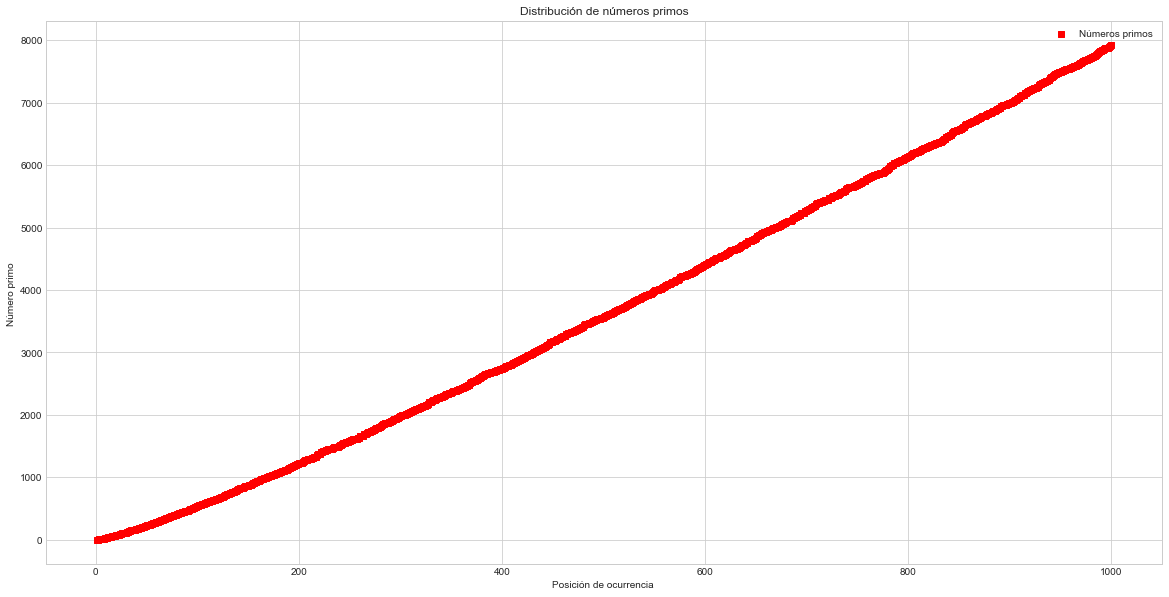

In [7]:
#Graficamos los primos en función de su orden de su posición

x=np.linspace(1,1000,1000)

plt.figure(figsize=(20,10))
plt.scatter(x,MisPrimos,marker=',',color='r',label="Números primos")
ax=plt.gca()
ax.set(xlabel='Posición de ocurrencia ', ylabel='Número primo ',title='Distribución de números primos')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

**3)** Genere los primeros 30 números de la sucesión de Fibonnaci. Use la sucesión para calcular el número áureo $\varphi = \frac{q+\sqrt{5}}{2} \approx 1.61803398$ (Opcionalmente, ¿Cuál es el origen de este número?).

Para calcular el número aúreo utilizaremos su definición en términos del límite $\varphi = \lim_{n \rightarrow \infty}\frac{F_{n+1}}{F_{n}} $, veáse A001622 en OEIS (Online Encyclopedia of Integer Sequences).

In [28]:
#Definimos la secuencia de Fibonnaci recursivamente.

def fibonacci(n):
    if n==0 or n==1:
        return n
    elif n<0:
# Por su definición, la secuencia también podría avanzar hacia los negativos.
        return fibonacci(n+2)-fibonacci(n+1)
    else:
        return fibonacci(n-1)+fibonacci(n-2)
    
#Imprimimos los n primeros términos de la secuencie de Fibonnaci (Incluimos el término F_0).
def fiboSecu(N_):
    fiboNum=[] 
    while len(fiboNum) < N_:
        fiboNum.append(fibonacci(len(fiboNum)))
    return fiboNum
MiSecu = fiboSecu(30)
print("Los primeros 30 números de Fibonnaci son: \n"+str(MiSecu[0:30])+"\n")

#Calculamos el número aúreo utilizando su definición en términos del límite.

def calculoPhi(Secu_):
    MiSecu = Secu_
    MiPhi=[]
    n=1
    while n < len(Secu_)-1:
        MiPhi.append( MiSecu[n+1]/MiSecu[n])
        n+=1
    return MiPhi

MiPhi=calculoPhi(MiSecu)[-1]
print("Utilizando su definición en términos del límite, el valor del número áureo es aproximadamente igual a " +str(MiPhi))

Los primeros 30 números de Fibonnaci son: 
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]

Utilizando su definición en términos del límite, el valor del número áureo es aproximadamente igual a 1.6180339887543225


**4)** Estime un error relativo $\epsilon = \frac{|Estimated\; - \; Real |}{Real}$

In [29]:
#Utilizando el estimativo relaizado anteriormente obtenemos el respectivo error relativo.

RealPhi = (1+np.sqrt(5))/2
errorR = np.abs(RealPhi-phiCalculado)/RealPhi
print("El error relativo de la estimación realizada es igual a "+str(errorR))

El error relativo de la estimación realizada es igual a 7.164150246971759e-12


**5)** Haga una gráfica entre la precisión $\epsilon$ vs la cantidad de números generados en la sucesión. Adicionalmente,
haga un ajuste polinomial para encontrar la dependencia. Esto debería ser algo como: $\epsilon \propto \frac{1}{\sqrt{n}}$

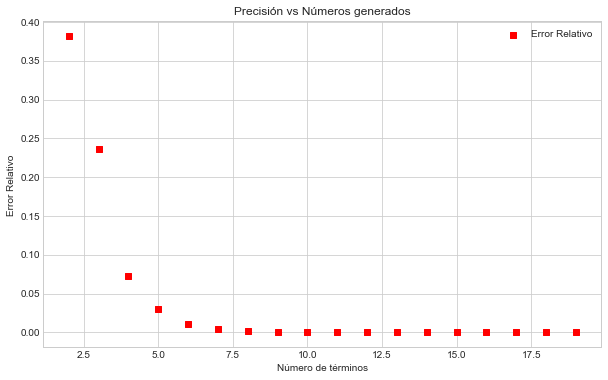

In [61]:
#Definimos el número total de términos que generaremos

N=20
MiSecu= fiboSecu(N)
listaPhi=calculoPhi(MiSecu)

listaError=[]

n=0
while n < len(listaPhi):
    errorR = np.abs(RealPhi-listaPhi[n])/RealPhi
    listaError.append(errorR)
    n+=1

x=np.linspace(2,N-1,N-2)



plt.figure(figsize=(10,6))


plt.scatter(x,listaError,marker=',',color='r',label="Error Relativo")
ax=plt.gca()
ax.set(xlabel='Número de términos', ylabel='Error Relativo ',title='Precisión vs Números generados')

plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()